# Example showing the output produced by the photoionization models

In [30]:
import numpy as np
import matplotlib.pyplot as plt

### Loading in the line labels, luminosity and parameter value files

In [63]:
all_labels = np.load('../models/test_model_low_res/test_model_low_res_age_2Myr_emission_line_labels.npy')
all_labels_dict = dict(zip(all_labels, range(len(all_labels))))
all_line_luminosities = np.load('../models/test_model_low_res/test_model_low_res_age_2Myr_emission_line_luminosity_file.npy')
parameter_values = np.load('../models/test_model_low_res/test_model_low_res_age_2Myr_parameters_file.npy')
all_line_luminosities.shape

(8, 4, 4, 6, 146)

In [64]:
all_labels

array(['C__3_977000A', 'N__3_991000A', 'H__1_102572A', 'BLND_103500A',
       'INCI_121500A', 'H__1_121567A', 'BLND_124000A', 'BLND_139700A',
       'BLND_140200A', 'BLND_140600A', 'BLND_148600A', 'BLND_154900A',
       'HE_2_164043A', 'BLND_175000A', 'BLND_186000A', 'BLND_190900A',
       'C__3_229690A', 'O__3_232095A', 'BLND_247100A', 'BLND_232600A',
       'BLND_233500A', 'BLND_266500A', 'BLND_279800A', 'NE_5_342603A',
       'BAC__364600A', 'O__2_372603A', 'BLND_372700A', 'O__2_372881A',
       'NE_3_386876A', 'HE_1_388863A', 'CA_2_393366A', 'S__2_406860A',
       'BLND_407400A', 'S__2_407635A', 'H__1_410173A', 'H__1_434046A',
       'BLND_436300A', 'HE_2_468564A', 'CA_B_468564A', 'NE_4_472417A',
       'AR_4_474012A', 'INCI_486000A', 'H__1_486133A', 'O__3_495891A',
       'O__3_500684A', 'N__1_520026A', 'FE14_530301A', 'O__1_557734A',
       'N__2_575461A', 'HE_1_587564A', 'BLND_630000A', 'O__1_636378A',
       'H__1_656281A', 'N__2_658345A', 'S__2_671644A', 'BLND_672000A',
      

### Luminosity and parameter files are structured in multidimensional way
- Dimension 1: Metallicities
- Dimension 2: Ionization parameter
- Dimension 3: Dust-to-metal ratio
- Dimension 4: Dust attenuation
- The last dimension in the parameter file has the parameter values of the main parameters (as listed above) + derived parameters. The last dimension of the luminosity file contains the luminosities of all the emission lines in the line labels file.

In [65]:
parameter_values.shape

(8, 4, 4, 6, 7)

In [66]:
all_line_luminosities.shape

(8, 4, 4, 6, 146)

### Plotting the modelled emission line ratios in a BPT diagram

42 44 52 53


(-2.5, 1.2)

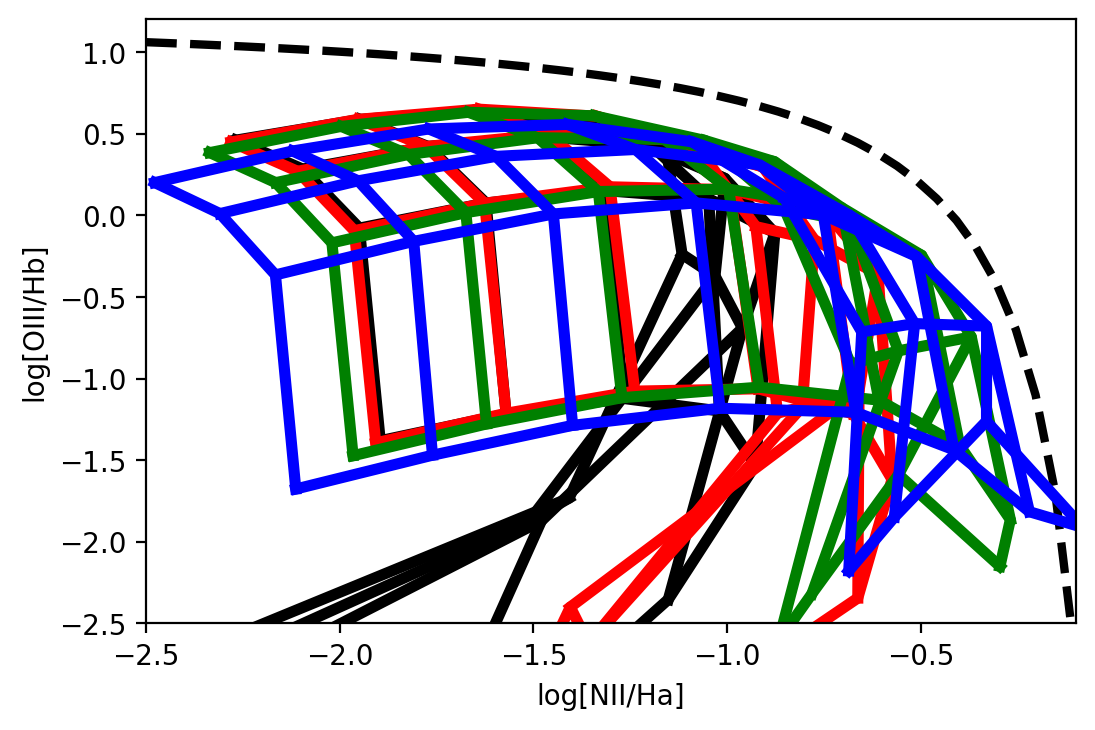

In [67]:
labels = ['H__1_486133A', 'O__3_500684A', 'H__1_656281A', 'N__2_658345A']
Hb, OIII, Ha, NII = [all_labels_dict.get(key) for key in labels]
print(Hb, OIII, Ha, NII)
colors=['k','r','g', 'b']
plt.figure(dpi=200)
line=np.linspace(-2.5,0.0)
plt.plot(line, 0.61/(line-0.05) + 1.3, c='k', linestyle='--', linewidth=3)
for i in range(4):
    plt.plot(np.log10(all_line_luminosities[:,:,i,0,NII]/all_line_luminosities[:,:,i,0,Ha]), 
             np.log10(all_line_luminosities[:,:,i,0,OIII]/all_line_luminosities[:,:,i,0,Hb]), c=colors[i], linewidth=4)
    plt.plot(np.log10(all_line_luminosities[:,:,i,0,NII]/all_line_luminosities[:,:,i,0,Ha]).T, 
             np.log10(all_line_luminosities[:,:,i,0,OIII]/all_line_luminosities[:,:,i,0,Hb]).T, c=colors[i], linewidth=4)

plt.xlabel('log[NII/Ha]')
plt.ylabel('log[OIII/Hb]')
plt.xlim(-2.5,-0.1)
plt.ylim(-2.5,1.2)